In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from __future__ import division

__author__     =['John C. Hood II']
__copyright__  =["Copyright 2018 John C. Hood II"]
__email__      =['hood.astro@gmail.com']
__maintainer__ =['John C. Hood II']


##FULL VNA TEST PLOTTING ALL OF THE DATA COLLECTED
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import *
from pylab import *
import seaborn as sns
sns.set(style='ticks')
size_ylabel = 12

#### This section is importing all of the dats from its respected files located in the directory: /Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/

In [2]:
### MICROSTRIPS
#1 INCH MICROSTRIP
filedir1 = '/Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/1_INCH_MICROSTRIP.csv'
SMALL_MICROSTRIP  = pd.read_csv(filedir1, skiprows=2)
#1 INCH MICROSTRIP SPLIT
filedir2 = '/Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/1_INCH_MICROSTRIP_SPLIT.csv'
SMALL_MICROSTRIP_SPLIT  = pd.read_csv(filedir2, skiprows=2)
#2 INCH MICROSTRIP
filedir3 = '/Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/2_INCH_MICROSTRIP.csv'
BIG_MICROSTRIP  = pd.read_csv(filedir3, skiprows=2)
#2 INCH MICROSTRIP SPLIT
filedir4 = '/Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/2_INCH_MICROSTRIP_SPLIT.csv'
BIG_MICROSTRIP_SPLIT  = pd.read_csv(filedir4, skiprows=2)

### GROUNDED CO-PLANAR WAVEGUIDS 
#1 INCH MICROSTRIP
filedir5 = '/Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/1_INCH_GCPW.csv'
SMALL_GCPW  = pd.read_csv(filedir5, skiprows=2)
#1 INCH MICROSTRIP
filedir6 = '/Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/1_INCH_GCPW_SPLIT.csv'
SMALL_GCPW_SPLIT  = pd.read_csv(filedir6, skiprows=2)
#1 INCH MICROSTRIP
filedir7 = '/Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/2_INCH_GCPW.csv'
BIG_GCPW  = pd.read_csv(filedir7, skiprows=2)
#1 INCH MICROSTRIP
filedir8 = '/Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/2_INCH_GCPW_SPLIT.csv'
BIG_GCPW_SPLIT  = pd.read_csv(filedir8, skiprows=2)
# OPEN CONNECTION
filedir9 = '/Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/OPEN_CONNECTIONS.csv'
OPEN  = pd.read_csv(filedir9, skiprows=2)

###CALIBRATED TEST SET
# CALIBRATED 2 INCH BOARD
filedir10 = '/Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/2_INCH_MICROSTRIP_CAL.csv'
CAL_2_MICRO = pd.read_csv(filedir10, skiprows=2)

filedir11 = '/Users/JohnHood/Documents/ACCURATE_TEST_RESULTS/2_INCH_MICROSTRIP_SPLIT_CAL.csv'
CAL_2_MICRO_SPLIT = pd.read_csv(filedir11, skiprows=2)

#### The next section is used  to find out what all of the column names are that will be plotted later on.

In [3]:
CAL_2_MICRO_SPLIT.dtypes

freq[Hz]       float64
re:Trc1_S11    float64
im:Trc1_S11    float64
re:Trc3_S22    float64
im:Trc3_S22    float64
re:Trc4_S11    float64
im:Trc4_S11    float64
re:Trc5_S22    float64
im:Trc5_S22    float64
re:Trc6_S12    float64
im:Trc6_S12    float64
re:Trc7_S21    float64
im:Trc7_S21    float64
re:Trc8_S12    float64
im:Trc8_S12    float64
re:Trc9_S21    float64
im:Trc9_S21    float64
Unnamed: 17    float64
dtype: object

In [4]:
print(len(CAL_2_MICRO['freq[Hz]']))
print(len(SMALL_MICROSTRIP['freq[Hz]']))

1601
201


#### This section will include all of the math converting the data to its proper formats(complex, GHz)

In [5]:
# GIGAHERTZ CALCULATION FOR ALL PLOTS
gigahertz  = (SMALL_MICROSTRIP['freq[Hz]'] / (10**9))
gigahertz2 = (CAL_2_MICRO['freq[Hz]'] / (10**9))

In [6]:
# CREATING COMPLEX NUMBERS

#### Here I renamed all of the boards for ease of typing in the following format:
#### sm = SMALL_MICROSTRIP, sms = SMALL_MICROSTRIP_SPLIT, bm = BIG_MICROSTRIP, bms = BIG_MICROSTRIP_SPLIT 
#### sg = SMALL_GCPW, sgs = SMALL_GCPW_SPLIT, bg = BIG_GCPW, bgs = BIG_GCPW_SPLIT 

In [7]:
sm   = SMALL_MICROSTRIP
sms  = SMALL_MICROSTRIP_SPLIT
bm   = BIG_MICROSTRIP
bms  = BIG_MICROSTRIP_SPLIT

sg   = SMALL_GCPW
sgs  = SMALL_GCPW_SPLIT
bg   = BIG_GCPW
bgs  = BIG_GCPW_SPLIT

cal1 = CAL_2_MICRO
cal2 = CAL_2_MICRO_SPLIT

##### COMPLEX NUMBERS AND REFLECTIONS FOR SMALL MICROSTRIPS

In [8]:
# COMPLEX NUMMBERS FOR SMALL_MICROSTRIP S_12
sm_Zd_S12  = (np.asarray(SMALL_MICROSTRIP['re:Trc5_S12']) + 1j * np.asarray(SMALL_MICROSTRIP['im:Trc5_S12']))

sm_Zm_S12  = (np.asarray(SMALL_MICROSTRIP['re:Mem15[Trc5]_S12']) + 1j * np.asarray(SMALL_MICROSTRIP['im:Mem15[Trc5]_S12']))

sm12_magnitude = 20*log10(abs(sm_Zd_S12/sm_Zm_S12))

In [9]:
# COMPLEX NUMMBERS FOR SMALL_MICROSTRIP S_21
sm_Zd_S21  = (np.asarray(SMALL_MICROSTRIP['re:Trc10_S21']) + 1j * np.asarray(SMALL_MICROSTRIP['im:Trc10_S21']))

sm_Zm_S21  = (np.asarray(SMALL_MICROSTRIP['re:Mem16[Trc10]_S21']) + 1j * np.asarray(SMALL_MICROSTRIP['im:Mem16[Trc10]_S21']))

sm21_magnitude = 20*log10(abs(sm_Zd_S21/sm_Zm_S21))

In [10]:
# REFLECTIONS FOR SMALL_MICROSTRIP 
sm_S11  = 20*log10(abs(np.asarray(SMALL_MICROSTRIP['re:Trc13_S11']) + 1j * np.asarray(SMALL_MICROSTRIP['im:Trc13_S11'])))

sm_S22  = 20*log10(abs(np.asarray(SMALL_MICROSTRIP['re:Trc14_S22']) + 1j * np.asarray(SMALL_MICROSTRIP['im:Trc14_S22'])))

##### COMPLEX NUMBERS AND REFLECTIONS FOR SMALL MICROSTRIPS SPLIT

In [11]:
# COMPLEX NUMMBERS FOR SMALL_MICROSTRIP_SPLIT S_12
sms_Zd_S12        = (np.asarray(SMALL_MICROSTRIP_SPLIT['re:Trc5_S12']) + 1j * np.asarray(SMALL_MICROSTRIP_SPLIT['im:Trc5_S12']))

sms_Zm_S12        = (np.asarray(SMALL_MICROSTRIP_SPLIT['re:Mem15[Trc5]_S12']) + 1j * np.asarray(SMALL_MICROSTRIP_SPLIT['im:Mem15[Trc5]_S12']))

sms12_magnitude = 20*log10(abs(sms_Zd_S12/sms_Zm_S12))

In [12]:
# COMPLEX NUMMBERS FOR SMALL_MICROSTRIP_SPLIT S_21
sms_Zd_S21        = (np.asarray(SMALL_MICROSTRIP_SPLIT['re:Trc10_S21']) + 1j * np.asarray(SMALL_MICROSTRIP_SPLIT['im:Trc10_S21']))

sms_Zm_S21        = (np.asarray(SMALL_MICROSTRIP_SPLIT['re:Mem16[Trc10]_S21']) + 1j * np.asarray(SMALL_MICROSTRIP_SPLIT['im:Mem16[Trc10]_S21']))

sms21_magnitude  = 20*log10(abs(sms_Zd_S21/sms_Zm_S21))

In [13]:
# REFLECTIONS FOR SMALL_MICROSTRIP SPLIT
sms_S11  = 20*log10(abs(np.asarray(SMALL_MICROSTRIP_SPLIT['re:Trc13_S11']) + 1j * np.asarray(SMALL_MICROSTRIP_SPLIT['im:Trc13_S11'])))

sms_S22  = 20*log10(abs(np.asarray(SMALL_MICROSTRIP_SPLIT['re:Trc14_S22']) + 1j * np.asarray(SMALL_MICROSTRIP_SPLIT['im:Trc14_S22'])))

#### COMPLEX NUMBERS FOR BIG MICROSTRIPS

In [14]:
# COMPLEX NUMBRERS FOR BIG_MICROSTRIP S_12
bm_Zd_S12        = (np.asarray(BIG_MICROSTRIP['re:Trc5_S12']) + 1j * np.asarray(BIG_MICROSTRIP['im:Trc5_S12']))

bm_Zm_S12        = (np.asarray(BIG_MICROSTRIP['re:Mem15[Trc5]_S12']) + 1j * np.asarray(BIG_MICROSTRIP['im:Mem15[Trc5]_S12']))

bm12_magnitude  = 20*log10(abs(bm_Zd_S12/bm_Zm_S12))

In [15]:
# COMPLEX NUMBERS FOR BIG_MICROSTRIP S_21
bm_Zd_S21        = (np.asarray(BIG_MICROSTRIP['re:Trc10_S21']) + 1j * np.asarray(BIG_MICROSTRIP['im:Trc10_S21']))

bm_Zm_S21        = (np.asarray(BIG_MICROSTRIP['re:Mem16[Trc10]_S21']) + 1j * np.asarray(BIG_MICROSTRIP['im:Mem16[Trc10]_S21']))

bm21_magnitude  = 20*log10(abs(bm_Zd_S21/bm_Zm_S21))

In [16]:
# REFLECTIONS FOR BIG_MICROSTRIP 
bm_S11  = 20*log10(abs(np.asarray(BIG_MICROSTRIP['re:Trc13_S11']) + 1j * np.asarray(BIG_MICROSTRIP['im:Trc13_S11'])))

bm_S22  = 20*log10(abs(np.asarray(BIG_MICROSTRIP['re:Trc14_S22']) + 1j * np.asarray(BIG_MICROSTRIP['im:Trc14_S22'])))

#### COMPLEX NUMBERS  AND REFLECTIONS FOR BIG MICROSTRIPS SPLIT

In [17]:
# COMPLEX NUMBRERS FOR BIG_MICROSTRIP_SPLIT S_12
bms_Zd_S12        = (np.asarray(BIG_MICROSTRIP_SPLIT['re:Trc5_S12']) + 1j * np.asarray(BIG_MICROSTRIP_SPLIT['im:Trc5_S12']))

bms_Zm_S12        = (np.asarray(BIG_MICROSTRIP_SPLIT['re:Mem15[Trc5]_S12']) + 1j * np.asarray(BIG_MICROSTRIP_SPLIT['im:Mem15[Trc5]_S12']))

bms12_magnitude  = 20*log10(abs(bms_Zd_S12/bms_Zm_S12))

In [18]:
# COMPLEX NUMBERS FOR BIG_MICROSTRIP S_21
bms_Zd_S21        = (np.asarray(BIG_MICROSTRIP_SPLIT['re:Trc10_S21']) + 1j * np.asarray(BIG_MICROSTRIP_SPLIT['im:Trc10_S21']))

bms_Zm_S21        = (np.asarray(BIG_MICROSTRIP_SPLIT['re:Mem16[Trc10]_S21']) + 1j * np.asarray(BIG_MICROSTRIP_SPLIT['im:Mem16[Trc10]_S21']))

bms21_magnitude  = 20*log10(abs(bms_Zd_S21/bms_Zm_S21))

In [19]:
# REFLECTIONS FOR BIG_MICROSTRIP_SPLIT
bms_S11  = 20*log10(abs(np.asarray(BIG_MICROSTRIP_SPLIT['re:Trc13_S11']) + 1j * np.asarray(BIG_MICROSTRIP_SPLIT['im:Trc13_S11'])))

bms_S22  = 20*log10(abs(np.asarray(BIG_MICROSTRIP_SPLIT['re:Trc14_S22']) + 1j * np.asarray(BIG_MICROSTRIP_SPLIT['im:Trc14_S22'])))

#### COMPLEX NUMBERS AND REFLECTIONS FOR SMALL GCPW

In [20]:
# COMPLEX NUMMBERS FOR SMALL_GCPW S_12
sg_Zd_S12  = (np.asarray(SMALL_GCPW ['re:Trc5_S12']) + 1j * np.asarray(SMALL_GCPW ['im:Trc5_S12']))

sg_Zm_S12  = (np.asarray(SMALL_GCPW ['re:Mem15[Trc5]_S12']) + 1j * np.asarray(SMALL_GCPW ['im:Mem15[Trc5]_S12']))

sg12_magnitude  = 20*log10(abs(sg_Zd_S12/sg_Zm_S12))

In [21]:
# COMPLEX NUMMBERS FOR SMALL_GCPW S_21
sg_Zd_S21 = (np.asarray(SMALL_GCPW['re:Trc10_S21']) + 1j * np.asarray(SMALL_GCPW['im:Trc10_S21']))

sg_Zm_S21 = (np.asarray(SMALL_GCPW['re:Mem16[Trc10]_S21']) + 1j * np.asarray(SMALL_GCPW['im:Mem16[Trc10]_S21']))

sg21_magnitude  = 20*log10(abs(sg_Zd_S21/sg_Zm_S21))

In [22]:
# REFLECTIONS FOR SMALL_GCPW
sg_S11  = 20*log10(abs(np.asarray(SMALL_GCPW['re:Trc13_S11']) + 1j * np.asarray(SMALL_GCPW['im:Trc13_S11'])))

sg_S22  = 20*log10(abs(np.asarray(SMALL_GCPW['re:Trc14_S22']) + 1j * np.asarray(SMALL_GCPW['im:Trc14_S22'])))

#### COMPLEX NUMBERS AND REFLECTIONS FOR SMALL GCPW SPLIT

In [23]:
# COMPLEX NUMMBERS FOR SMALL_GCPW S_12
sgs_Zd_S12  = (np.asarray(SMALL_GCPW_SPLIT['re:Trc5_S12']) + 1j * np.asarray(SMALL_GCPW_SPLIT['im:Trc5_S12']))

sgs_Zm_S12  = (np.asarray(SMALL_GCPW_SPLIT['re:Mem15[Trc5]_S12']) + 1j * np.asarray(SMALL_GCPW_SPLIT['im:Mem15[Trc5]_S12']))

sgs12_magnitude  = 20*log10(abs(sgs_Zd_S12/sgs_Zm_S12))

In [24]:
# COMPLEX NUMMBERS FOR SMALL_GCPW_SPLIT S_21
sgs_Zd_S21 = (np.asarray(SMALL_GCPW_SPLIT['re:Trc10_S21']) + 1j * np.asarray(SMALL_GCPW_SPLIT['im:Trc10_S21']))

sgs_Zm_S21 = (np.asarray(SMALL_GCPW_SPLIT['re:Mem16[Trc10]_S21']) + 1j * np.asarray(SMALL_GCPW_SPLIT['im:Mem16[Trc10]_S21']))

sgs21_magnitude  = 20*log10(abs(sgs_Zd_S21/sgs_Zm_S21))

In [25]:
# REFLECTIONS FOR SMALL_GCPW_SPLIT
sgs_S11  = 20*log10(abs(np.asarray(SMALL_GCPW_SPLIT['re:Trc13_S11']) + 1j * np.asarray(SMALL_GCPW_SPLIT['im:Trc13_S11'])))

sgs_S22  = 20*log10(abs(np.asarray(SMALL_GCPW_SPLIT['re:Trc14_S22']) + 1j * np.asarray(SMALL_GCPW_SPLIT['im:Trc14_S22'])))

#### COMPLEX NUMBERS AND REFLECTIONS FOR BIG GCPW

In [26]:
# COMPLEX NUMMBERS FOR SMALL_GCPW S_12
bg_Zd_S12  = (np.asarray(BIG_GCPW['re:Trc5_S12']) + 1j * np.asarray(BIG_GCPW['im:Trc5_S12']))

bg_Zm_S12  = (np.asarray(BIG_GCPW['re:Mem15[Trc5]_S12']) + 1j * np.asarray(BIG_GCPW['im:Mem15[Trc5]_S12']))

bg12_magnitude  = 20*log10(abs(bg_Zd_S12/bg_Zm_S12))

In [27]:
# COMPLEX NUMMBERS FOR SMALL_GCPW_SPLIT S_21
bg_Zd_S21 = (np.asarray(BIG_GCPW['re:Trc10_S21']) + 1j * np.asarray(BIG_GCPW['im:Trc10_S21']))

bg_Zm_S21 = (np.asarray(BIG_GCPW['re:Mem16[Trc10]_S21']) + 1j * np.asarray(BIG_GCPW['im:Mem16[Trc10]_S21']))

bg21_magnitude  = 20*log10(abs(bg_Zd_S21/bg_Zm_S21))

In [28]:
# REFLECTIONS FOR SMALL_GCPW_SPLIT
bg_S11  = 20*log10(abs(np.asarray(BIG_GCPW['re:Trc13_S11']) + 1j * np.asarray(BIG_GCPW['im:Trc13_S11'])))

bg_S22  = 20*log10(abs(np.asarray(BIG_GCPW['re:Trc14_S22']) + 1j * np.asarray(BIG_GCPW['im:Trc14_S22'])))

#### COMPLEX NUMBERS AND REFLECTIONS FOR BIG GCPW SPLIT

In [29]:
# COMPLEX NUMMBERS FOR BIG_GCPW_SPLIT S_12
bgs_Zd_S12  = (np.asarray(BIG_GCPW_SPLIT['re:Trc5_S12']) + 1j * np.asarray(BIG_GCPW_SPLIT['im:Trc5_S12']))

bgs_Zm_S12  = (np.asarray(BIG_GCPW_SPLIT['re:Mem15[Trc5]_S12']) + 1j * np.asarray(BIG_GCPW_SPLIT['im:Mem15[Trc5]_S12']))

bgs12_magnitude  = 20*log10(abs(bgs_Zd_S12/bgs_Zm_S12))

In [30]:
# COMPLEX NUMMBERS FOR BIG_GCPW_SPLIT S_21
bgs_Zd_S21 = (np.asarray(BIG_GCPW_SPLIT['re:Trc10_S21']) + 1j * np.asarray(BIG_GCPW_SPLIT['im:Trc10_S21']))

bgs_Zm_S21 = (np.asarray(BIG_GCPW_SPLIT['re:Mem16[Trc10]_S21']) + 1j * np.asarray(BIG_GCPW_SPLIT['im:Mem16[Trc10]_S21']))

bgs21_magnitude  = 20*log10(abs(bgs_Zd_S21/bgs_Zm_S21))

In [31]:
# REFLECTIONS FOR BIG_GCPW_SPLIT
bgs_S11  = 20*log10(abs(np.asarray(BIG_GCPW_SPLIT['re:Trc13_S11']) + 1j * np.asarray(BIG_GCPW_SPLIT['im:Trc13_S11'])))

bgs_S22  = 20*log10(abs(np.asarray(BIG_GCPW_SPLIT['re:Trc14_S22']) + 1j * np.asarray(BIG_GCPW_SPLIT['im:Trc14_S22'])))

CODE FOR CALIBRATED 2 INCH MICROSTRIP

In [32]:
## ALL CALIBRATED 2 INCH MICROSTRIP DATA
# COMPLEX NUMMBERS FOR S_12
cal1_S11  = 20*log10(abs(np.asarray(CAL_2_MICRO['re:Trc1_S11']) + 1j * np.asarray(CAL_2_MICRO['im:Trc1_S11'])))

cal1_S22  = 20*log10(abs(np.asarray(CAL_2_MICRO['re:Trc3_S22']) + 1j * np.asarray(CAL_2_MICRO['im:Trc3_S22'])))

cal1_S12  = 20*log10(abs(np.asarray(CAL_2_MICRO['re:Trc8_S12']) + 1j * np.asarray(CAL_2_MICRO['im:Trc8_S12'])))

cal1_S21  = 20*log10(abs(np.asarray(CAL_2_MICRO['re:Trc9_S21']) + 1j * np.asarray(CAL_2_MICRO['im:Trc9_S21'])))


#### PHASE CALCULATIONS

In [33]:
#sm_phase = np.arctan2(np.asarray(SMALL_MICROSTRIP['re:Trc5_S12'],(1j * np.asarray(SMALL_MICROSTRIP['im:Trc5_S12']))))

#### Plotting section

 Figure:full_data_sheet.png


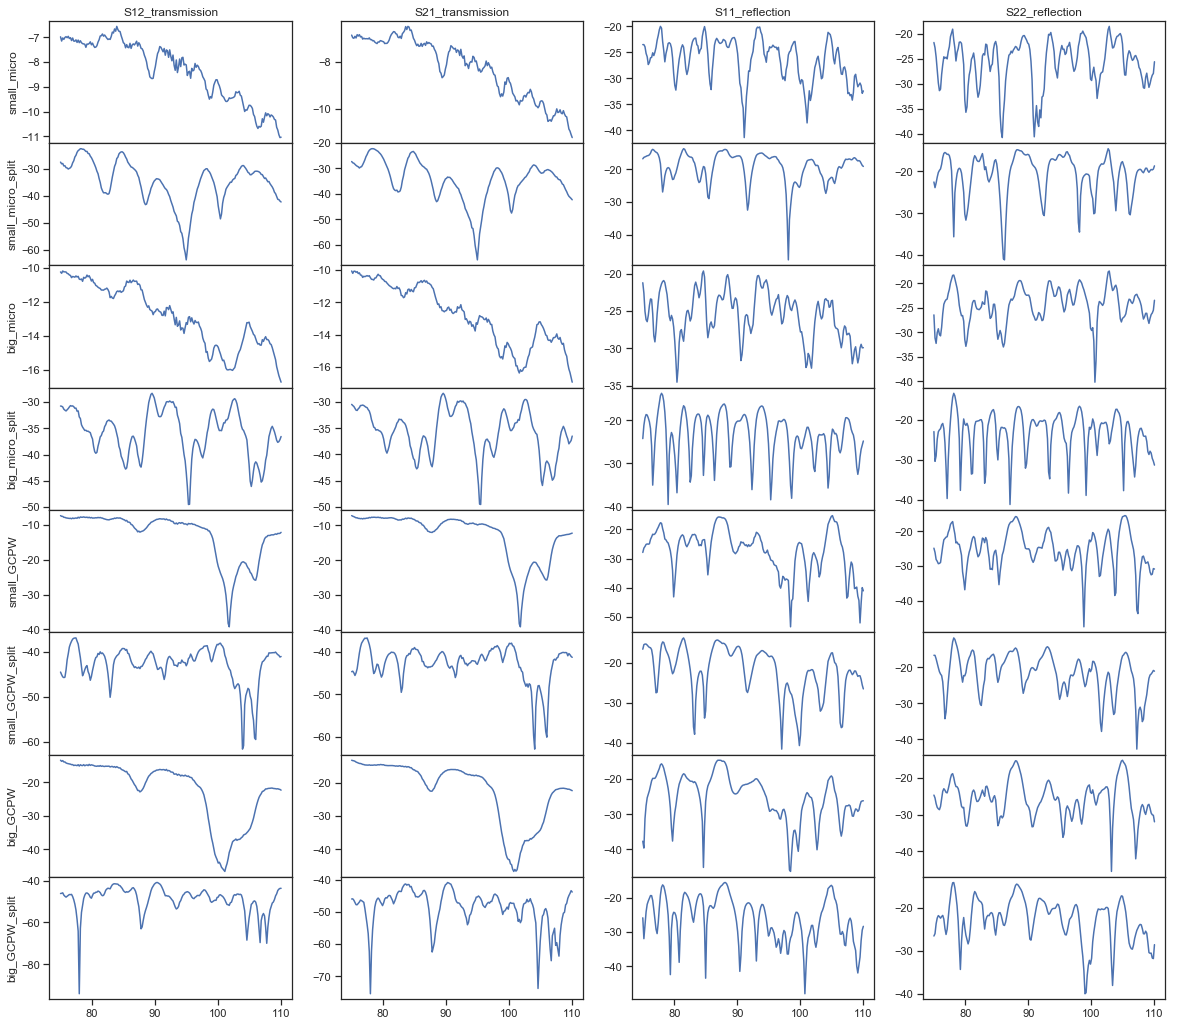

In [34]:
fig = plt.figure(figsize=(20,18))
gs  = plt.GridSpec(8,4, hspace=0)

## SMALL MICROS

ax1 = fig.add_subplot(gs[0])
ax1.set_title('S12_transmission')
ax1.set_ylabel('small_micro', fontsize=size_ylabel)
ax1.plot(gigahertz, sm12_magnitude)

ax2 = fig.add_subplot(gs[1])
ax2.set_title('S21_transmission')
ax2.plot(gigahertz, sm21_magnitude)

ax3 = fig.add_subplot(gs[2])
ax3.set_title('S11_reflection')
ax3.plot(gigahertz, sm_S11)

ax4 = fig.add_subplot(gs[3])
ax4.set_title('S22_reflection')
ax4.plot(gigahertz, sm_S22)

ax5 = fig.add_subplot(gs[4])
ax5.set_ylabel('small_micro_split', fontsize=size_ylabel)
ax5.plot(gigahertz, sms12_magnitude)

ax6 = fig.add_subplot(gs[5])
ax6.plot(gigahertz, sms21_magnitude)

ax7 = fig.add_subplot(gs[6])
ax7.plot(gigahertz, sms_S11)

ax8 = fig.add_subplot(gs[7])
ax8.plot(gigahertz, sms_S22)

## BIG MICROS

ax9 = fig.add_subplot(gs[8])
ax9.set_ylabel('big_micro', fontsize=size_ylabel)
ax9.plot(gigahertz, bm12_magnitude)

ax10 = fig.add_subplot(gs[9])
ax10.plot(gigahertz, bm21_magnitude)

ax11 = fig.add_subplot(gs[10])
ax11.plot(gigahertz, bm_S11)

ax12 = fig.add_subplot(gs[11])
ax12.plot(gigahertz, bm_S22)

ax13 = fig.add_subplot(gs[12])
ax13.set_ylabel('big_micro_split', fontsize=size_ylabel)
ax13.plot(gigahertz, bms12_magnitude)

ax14 = fig.add_subplot(gs[13])
ax14.plot(gigahertz, bms21_magnitude)

ax15 = fig.add_subplot(gs[14])
ax15.plot(gigahertz, bms_S11)

ax16 = fig.add_subplot(gs[15])
ax16.plot(gigahertz, bms_S22)

## SMALL GCPW

ax17 = fig.add_subplot(gs[16])
ax17.set_ylabel('small_GCPW', fontsize=size_ylabel)
ax17.plot(gigahertz, sg12_magnitude)

ax18 = fig.add_subplot(gs[17])
ax18.plot(gigahertz, sg21_magnitude)

ax19 = fig.add_subplot(gs[18])
ax19.plot(gigahertz, sg_S11)

ax20 = fig.add_subplot(gs[19])
ax20.plot(gigahertz, sg_S22)

ax21 = fig.add_subplot(gs[20])
ax21.set_ylabel('small_GCPW_split', fontsize=size_ylabel)
ax21.plot(gigahertz, sgs12_magnitude)

ax22 = fig.add_subplot(gs[21])
ax22.plot(gigahertz, sgs21_magnitude)

ax23 = fig.add_subplot(gs[22])
ax23.plot(gigahertz, sgs_S11)

ax24 = fig.add_subplot(gs[23])
ax24.plot(gigahertz, sgs_S22)

## BIG GCPW

ax25 = fig.add_subplot(gs[24])
ax25.set_ylabel('big_GCPW', fontsize=size_ylabel)
ax25.plot(gigahertz, bg12_magnitude)

ax26 = fig.add_subplot(gs[25])
ax26.plot(gigahertz, bg21_magnitude)

ax27 = fig.add_subplot(gs[26])
ax27.plot(gigahertz, bg_S11)

ax28 = fig.add_subplot(gs[27])
ax28.plot(gigahertz, bg_S22)

ax29 = fig.add_subplot(gs[28])
ax29.set_ylabel('big_GCPW_split', fontsize=size_ylabel)
ax29.plot(gigahertz, bgs12_magnitude)

ax30 = fig.add_subplot(gs[29])
ax30.plot(gigahertz, bgs21_magnitude)

ax31 = fig.add_subplot(gs[30])
ax31.plot(gigahertz, bgs_S11)

ax32 = fig.add_subplot(gs[31])
ax32.plot(gigahertz, bgs_S22)

fname = 'full_data_sheet.png'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()



In [35]:
# COMPLEX NUMMBERS FOR OPEN S_12
o_S11  = 20*log10(abs(np.asarray(OPEN['re:Trc13_S11']) + 1j * np.asarray(OPEN['im:Trc13_S11'])))

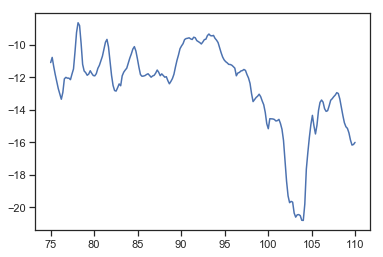

In [36]:
plt.plot(gigahertz, o_S11)
plt.show()

 Figure:cal_test_check.pdf


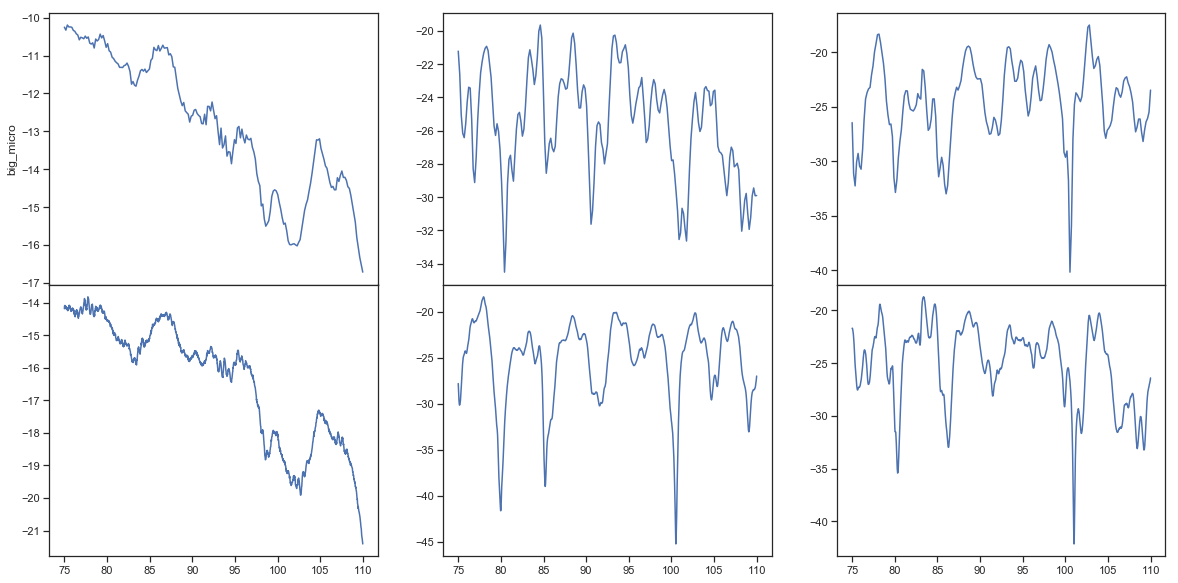

In [37]:
fig = plt.figure(figsize=(20,10))
gs  = plt.GridSpec(2,3, hspace=0)

ax1 = fig.add_subplot(gs[0])
ax1.set_ylabel('big_micro', fontsize=size_ylabel)
ax1.plot(gigahertz, bm12_magnitude)

ax2 = fig.add_subplot(gs[1])
ax2.plot(gigahertz, bm_S11)

ax3 = fig.add_subplot(gs[2])
ax3.plot(gigahertz, bm_S22)

ax4 = fig.add_subplot(gs[3])
ax4.plot(gigahertz2, cal1_S12)

ax5 = fig.add_subplot(gs[4])
ax5.plot(gigahertz2, cal1_S11)

ax6 = fig.add_subplot(gs[5])
ax6.plot(gigahertz2, cal1_S22)

fname = 'cal_test_check.pdf'
plt.savefig(fname,bbox_inches='tight')
print(' Figure:{0}'.format(fname))
plt.show()

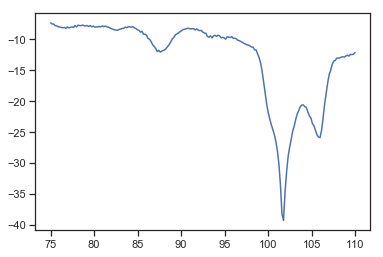

In [38]:
plt.plot(gigahertz, sg12_magnitude)
plt.show()

In [39]:
print(sg12_magnitude)

[ -7.32414442  -7.53197642  -7.54010282  -7.80624853  -7.83225906
  -7.97518297  -8.02485503  -8.08733606  -8.13264712  -8.09256606
  -8.22637306  -8.01297668  -8.15150805  -8.05722927  -7.994332
  -8.09094553  -7.78454878  -8.00562884  -7.70866253  -7.79208096
  -7.79256927  -7.69733047  -7.80597508  -7.83485599  -7.77123116
  -7.93050765  -7.78323669  -7.98607097  -7.86435586  -8.0240753
  -8.01387097  -7.99345826  -7.93183923  -7.97163207  -7.8480221
  -7.93990419  -7.8593655   -7.99677778  -8.03270227  -8.19306914
  -8.29044968  -8.36212341  -8.47859675  -8.51674815  -8.54224152
  -8.39869214  -8.35250843  -8.23446736  -8.22501911  -8.03489937
  -8.13229268  -7.96031625  -8.00471237  -8.03991919  -7.97651416
  -8.14965144  -8.2562796   -8.45645689  -8.54289302  -8.83999624
  -8.69864011  -9.17591683  -9.18649279  -9.32848138  -9.86147363
  -9.98358946 -10.38142414 -10.859289   -11.16339271 -11.46219162
 -11.98539468 -11.76935355 -12.07026109 -11.92096537 -11.80867048
 -11.68190858 